In [17]:
#pylab
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pylab import imshow, show

import skimage as sk
from skimage import measure

#use cuda via numba
# from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
# from lib.contours_to_tips import *
from lib.minimal_model import *
from lib.TexturePlot import *

#automate the boring stuff
from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()

%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


# _Detect spiral tips before/after placing that box_

In [70]:
#nonlocal cond1
minvlt = 4*(0.5+0.9)
maxvlt = 4*(3.5 +0.9)
cond1 = lambda x: minvlt < x < maxvlt

#nonlocal cond2
mindvdt = 4*(0.25+0.9)
maxdvdt = 4*(3.5 +0.9)
cond2 = lambda x: mindvdt < x < maxdvdt

Vth  = minvlt#np.around(minvlt+maxvlt)/2
dVth = mindvdt#np.around(mindvdt+maxdvdt)/2
print(f"voltage threshold = {Vth}.")
print(f"dvdt threshold = {dVth}.")

voltage threshold = 5.6.
dvdt threshold = 4.6.


In [28]:
# %pwd

'/Users/timothytyree/Documents/GitHub/care/notebooks'

In [31]:
# np.load('Data/buffer_time_origin_primed.npy')


In [20]:
# before_box = txt.copy()
# after_box = image.copy()

# _Old algorithm to the new context_
- cond1: take a local average voltage above threshold, Uth = 0.9 and returning true if that average was greater than 4*0.5=2 and less than 3.5*4=14
    - nonlocal cond1: find contour where minvlt < x < maxvlt
- cond2: take the local average of the previous timestep of voltage and and returning true if that average was greater than 4*0.25=1 and less than 3.5*4=14
    - nonlocal cond2: find contour where mindvdt < dvdt < maxdvdt
- tips are located at the intersection of these two curves

In [102]:

# img_nxt = txt[...,0]
# img_nxt = before_box[...,0]
# img_nxt = after_box[...,0]

In [126]:
# print(f"""
# max increase: {np.max(img_inc[img_inc>0])}
# min increase: {np.min(img_inc[img_inc>0])}
# mean increase: {np.mean(img_inc[img_inc>0])}
# """)

In [105]:
# contours_raw = measure.find_contours(img_nxt, Vth, fully_connected='low', positive_orientation='low')
# contours_inc = measure.find_contours(img_inc, dVth)

In [106]:
# measure.find_contours?
# contours_edge

In [107]:
# Vth
# dVth
# df = pd.concat([pd.DataFrame(c,columns =['y', 'x']) for c in contours_raw], axis=0)
# print(df)


In [108]:
# contour_props = {level = }
# image_next
contours_raw = measure.find_contours(img_nxt, level = 5, fully_connected='low', positive_orientation='low')
contours_inc = measure.find_contours(img_inc, level = 5)
if 'contours_raw' not in globals():
    contours_raw=[]
if 'contours_edge' not in globals():
    contours_edge=[]
assert(type(contours_raw))
assert(type(contours_raw))

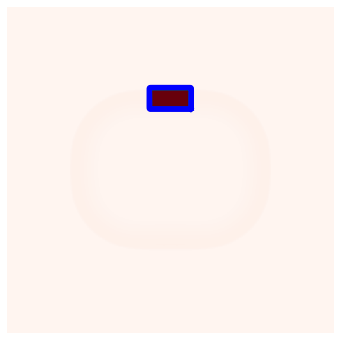

In [114]:
plt.figure(figsize=(6,6))
plt.imshow(img_nxt, cmap='Reds', vmax = 30)
for n, contour in enumerate(contours_raw):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=5, c='green')
for n, contour in enumerate(contours_inc):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=5, c='blue')
plt.axis(False)
# plt.show()
# save_dir = f"before_box.png"
save_dir = f"after_box_thick_green.png"
# plt.savefig(save_dir, dpi = 512/10)

In [111]:
# contours_raw


In [113]:
from lib.contours_to_tips import *
# list_tips  = contours_to_tips(contours_raw=contours_raw, contours_edge = contours_inc, inc = contours_inc)
contours_to_tips(contours_raw, contours_inc, inc = contours_inc)

[autoreload of lib.contours_to_tips failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 378, in superreload
    module = reload(module)
  File "/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

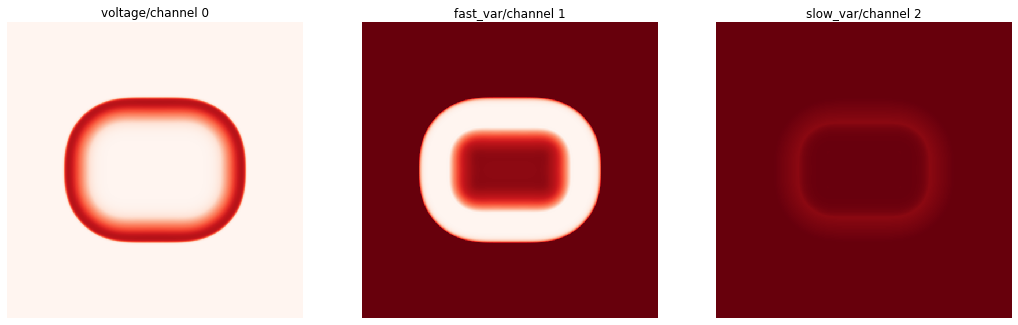

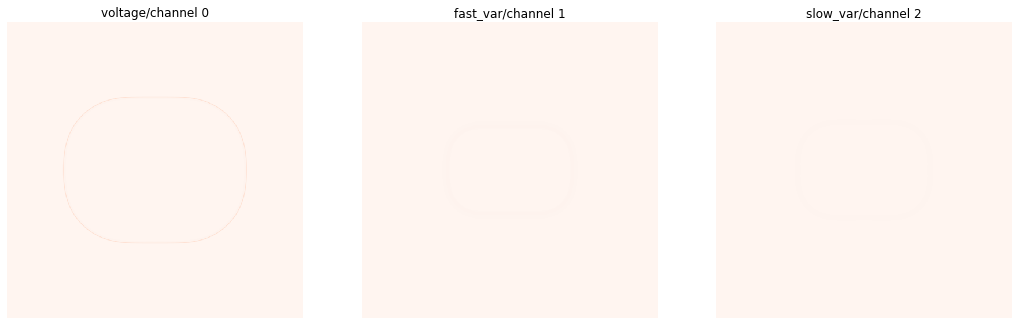

In [224]:
# txt = np.load('Data/buffer_test_error.npy')
txt = np.load('Data/buffer_time_origin.npy')
dtexture_dt = np.zeros((width, height, channel_no), dtype = np.float64)
get_time_step(txt , dtexture_dt)
display_texture(txt, vmins=(0,0,0),vmaxs=(1,1,1))
display_texture(dtexture_dt, vmins=(0,0,0),vmaxs=(1,1,1))

In [165]:

# @njit
# def square(x):
#     x -= x
#     return x

In [115]:
# x_values =  np.linspace(-5,5)
# y_values =  [Tanh(x) for x in x_values]

In [241]:
# @njit
# def step(a,b):
# 	return 0 if a>b else 1
# plt.scatter(x=x_values, y=[step(0,x) for x in x_values])
# # plt.scatter(x=x_values, y=[np.heaviside(x,0) for x in x_values])

In [202]:
buffer_time_origin

In [225]:
describe_texture(txt[...,0])
describe_texture(txt[...,1])
describe_texture(txt[...,2])

max value: 0.8220734919420856
    min value: -5.842994007759086e-09
    mean value: 0.07776932446174945
max value: 1.0
    min value: 4.2730396698647395e-07
    mean value: 0.8207531354970061
max value: 0.9999357315470903
    min value: 0.9255846617243946
    mean value: 0.9930852439857958


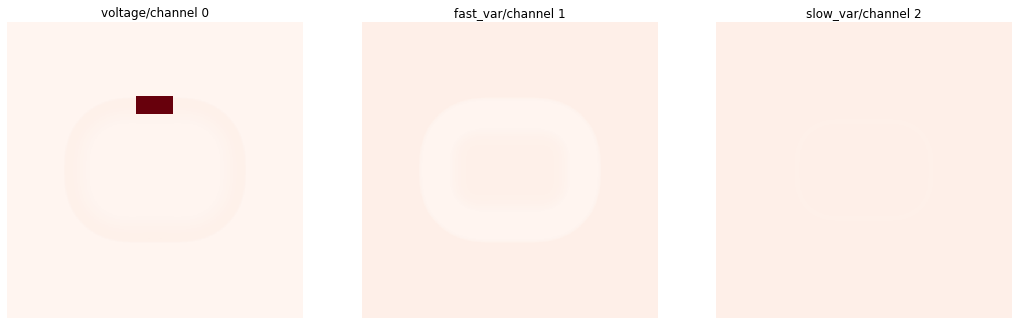

In [139]:
#TODO :switch the x's and y's to correspond to the picture
image = txt.copy()
set_voltage_in_box(
    image,
    min_y=128,
    max_y=128+32,
    min_x=256-32,#150,
    max_x=256+32,#200,
    width=512,
    height=512,
    value=30.0,
)
display_texture(image, vmins=(0,0,0),vmaxs=(30,30,30))

In [143]:
# np.save(f'Data/buffer_time_origin_primed.npy', image)
# np.save(f'Data/buffer_time_origin_primed.npz', image)
# np.savez_compressed(f'Data/buffer_time_origin_primed.npz', image)
# np.savez_compressed(f'Data/buffer_time_origin.npz', np.load('Data/buffer_time_origin.npy'))

# time step texture and append the spiral tips present to a list

In [120]:
#reinitialize
lst = []
tme = 0

# load txt
txt = np.load('Data/buffer_time_origin_primed.npy')
width, height, channel_no = txt.shape
dtexture_dt = np.zeros((width, height, channel_no), dtype=np.float64)
get_time_step(txt, dtexture_dt)
img_inc = dtexture_dt[..., 0]
img_nxt = txt[..., 0]

In [ ]:
#integrate explicitely in time
# tmax = 1
h = 0.1
nsteps = 1#np.int64(tmax/h)
for step in range(nsteps):
    
    ###integrate explicitely in time
    time_step(txt, h=h)
    tme += h
    
    #compute contours here
    contours_raw = measure.find_contours(img_nxt, level = 5, fully_connected='low', positive_orientation='low')
    contours_inc = measure.find_contours(img_inc, level = 5)
    if 'contours_raw' not in globals():
        contours_raw=[]
    if 'contours_edge' not in globals():
        contours_edge=[]
        
    #TODO: compute spiral tips here
    
    
#     tips = []
    
    #save tips if any here
    if len(tips)!=0:
        lst.append(tips)
    else:
        pass
    
#BLUF report
print(f"current time is {tme}.")
print(f"number of nan pixel voltages is {np.max(sum(np.isnan(txt[...,0])))}.")
print(f"current mean voltage is {np.mean(txt[...,0])}.")
print(f"current mean fast variable is {np.mean(txt[...,1])}.")
print(f"current mean slow variable is {np.mean(txt[...,2])}.")



In [138]:
contours_raw[0].shape

(193, 2)

In [ ]:
dtexture_dt = np.zeros((width, height, channel_no), dtype=np.float64)
get_time_step(txt, dtexture_dt)
display_texture(txt, vmins=(0, 0, 0), vmaxs=(1, 1, 1))
display_texture(dtexture_dt, vmins=(-1, -1, -1), vmaxs=(1, 1, 1))
describe_texture(txt[..., 0])
describe_texture(txt[..., 1])
describe_texture(txt[..., 2])

# TODO: intersection of two lists